# Verification of terminal digits test

Verification of the terminal digits test.
In this case the three colony counts are considered independent
extrations.
The hypotesis is that the last digit of each count can be modeled
as a draw from a uniform distribution.

REMOVE ME: (This version uses the same data import of the other tests - pandas...)

In [1]:
# import numpy and matlab plot library

import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt

# import panda
import pandas as pd

In [2]:
#REMOVE ME - only one needed in the final notebook
## List of Functions

# This function takes an N by 3 matrix, sorts the matrix row wise, and then computes the ratio of (mid-min)/(max-min)
# for each row (excludes the rows with all equal entries.)
def compute_ratio(M):
    M.sort(axis=1)
    if (M.shape[1]!=3):
        print 'Size is flawed '
        print M.shape
        
    mid_min = M[:, 1] - M[:, 0]
    max_min = M[:, 2] - M[:, 0]
    ratio = ([mid_min[t]/max_min[t] for t in range(max_min.shape[0]) if max_min[t] !=0 ])
    return np.asarray(ratio)

# This function returns a list of last digits for an np array/ndarray input, and ignores the NAN values
def compute_last_digit(n_arr):
    n_arr = n_arr.flatten()
    return [int (n%10) for n in n_arr if not(np.isnan(n))]

# This function simply plots a histogram of the data (named ratio) with a given title and displays it inline.
def plot_np_hist(ratio, s='Title', show=False):
    plt.hist(ratio, bins=10, normed = False)
    plt.title(s)
    if show:
        plt.show()

# The next two functions are for obtaining histograms that look similar to the ones given in the paper. In these versions
# since we have to include the right hand edge, I do it manually - both the computation and the plotting of the bars.
def compute_my_histogram(ratio):
    v = np.zeros(10)
    N = len(ratio)
    v[0] = np.sum([( x <= 0.1) for x in ratio])
    for i in range(2, 11):
        thr = float(i) /10.
        v[i-1] = np.sum([( x <= thr and x > thr-0.1) for x in ratio])
    v /= np.sum(v)
    return v
def plot_my_histogram(v, s='Title', show=False):
    x = np.linspace(0,1,10,endpoint=False)
    plt.bar(x, v, width=0.1)
    plt.title(s)
    if show:
        plt.show()

In [20]:
# Load the datasets, with the investigator label for the data of the other labmates.

rts_colony_df = pd.read_excel("data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx", 
                              na_values = [' '], skiprows=[0,1], parse_cols = ("D:F"), header = 0)   

rest_colony_df = pd.read_excel("data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx", 
                               na_values = [' '], header = 0, skiprows = [0], parse_cols = ("C:F"))

out3_colony_df = pd.read_excel("data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("B:D"))

rts_coulter_df = pd.read_excel("data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx", 
                               na_values = [' '], skiprows=[0], parse_cols = ("C:E"), header = 0)   

rest_coulter_df = pd.read_excel("data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("C:E,G"))

out1_coulter_df = pd.read_excel("data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx", 
                                na_values = [' '], header = None, skiprows = [0], parse_cols = ("B:D"))

out2_coulter_df = pd.read_excel("data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("B:D"))



In [26]:
print rts_colony_df.values[0:3,:]
print rest_colony_df.values[0:3,:]
print out3_colony_df.values[0:3,:]
print rts_coulter_df.values[0:3,:]
print rest_coulter_df.values[0:3,:]
print out1_coulter_df.values[0:3,:]
print out2_coulter_df.values[0:3,:]

pool_coulter = np.vstack([rts_coulter_df.values, rest_coulter_df.values[:,0:3], out1_coulter_df, out2_coulter_df])
pool_colony = np.vstack([rts_colony_df.values, rest_colony_df.values[:,1:4], out3_colony_df])
pool_all = np.vstack([pool_coulter, pool_colony])

print pool_coulter[0:3,:]
print pool_colony[0:3,:]
print pool_all[0:3,:]

[[ 78.  91.  93.]
 [ 90.  88.  90.]
 [ 80.  66.  69.]]
[[u'I' 266 247.0 262.0]
 [u'I' 170 151.0 156.0]
 [u'I' 66 66.0 56.0]]
[[54 55 59]
 [47 60 47]
 [55 60 53]]
[[ 531.  508.  541.]
 [ 650.  626.  595.]
 [ 460.  455.  468.]]
[[1547.0 1574.0 1523.0 u'I']
 [1617.0 1552.0 1570.0 u'I']
 [1258.0 1279.0 1284.0 u'I']]
[[ 2266.  2321.  2192.]
 [  676.   554.   478.]
 [  601.   723.   520.]]
[[5868 5838 5691]
 [3451 3343 3315]
 [4844 4854 4695]]
[[531.0 508.0 541.0]
 [650.0 626.0 595.0]
 [460.0 455.0 468.0]]
[[78.0 91.0 93.0]
 [90.0 88.0 90.0]
 [80.0 66.0 69.0]]
[[531.0 508.0 541.0]
 [650.0 626.0 595.0]
 [460.0 455.0 468.0]]


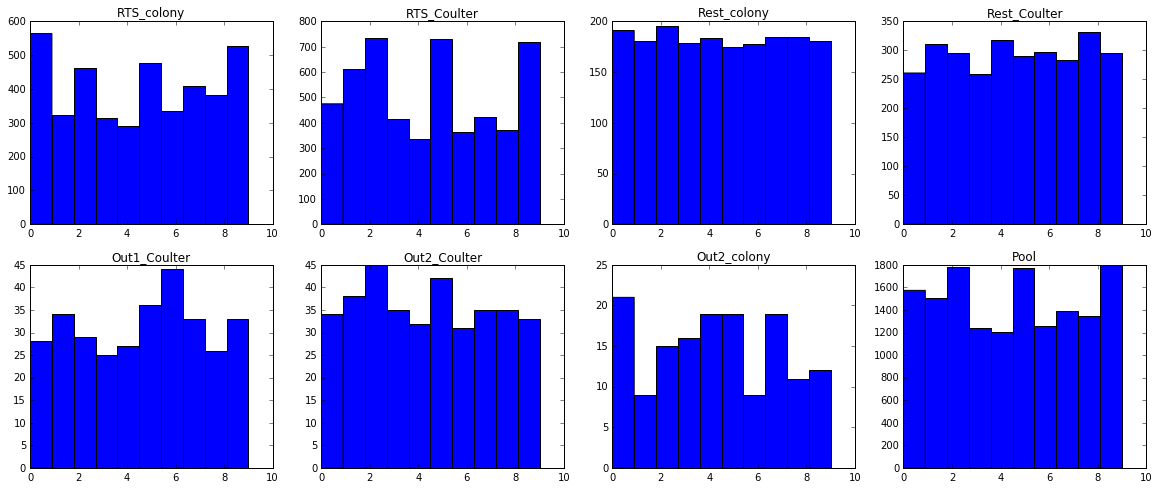

In [31]:
# In this section we plot the distribution of last digit for RTS, Rest and All of them pooled together for the Coulter
# Data. We ignore the NAN values

# Compute the last digit distribution
rld = compute_last_digit(rts_coulter_df.values)
rc_ld = compute_last_digit(rts_colony_df.values)
rest_ld = compute_last_digit(rest_coulter_df.values[:,0:3])
restc_ld = compute_last_digit(rest_colony_df.values[:,1:4])
out1_ld = compute_last_digit(out1_coulter_df.values)
out2_ld = compute_last_digit(out2_coulter_df.values)
out3_ld = compute_last_digit(out3_colony_df.values)
pool_ld = np.concatenate([rld, rc_ld, rest_ld, restc_ld, out1_ld, out2_ld, out3_ld])

# Now Plot
plt.figure(figsize=[20,8])
plt.subplot(241)
plot_np_hist(rc_ld, 'RTS_colony')
plt.subplot(242)
plot_np_hist(rld, 'RTS_Coulter')
plt.subplot(243)
plot_np_hist(restc_ld, 'Rest_colony')
plt.subplot(244)
plot_np_hist(rest_ld, 'Rest_Coulter')
plt.subplot(245)
plot_np_hist(out1_ld, 'Out1_Coulter')
plt.subplot(246)
plot_np_hist(out2_ld, 'Out2_Coulter')
plt.subplot(247)
plot_np_hist(out3_ld, 'Out3_colony')
plt.subplot(248)
plot_np_hist(pool_ld, 'Pool')

plt.show()

In [ ]:
# Now, we decompose the rest group by the unnamed labmates, there are 9 other labmates. We plot last-digit histogram
def cld_val(df):
    return compute_last_digit(df.values[:,0:3])

rest_grouped_ld = rest_coulter_df.groupby("Investigator").apply(cld_val)
plt.figure(figsize = [16,5])
for j in range(rest_grouped_ld.shape[0]):
    plt.subplot(2,6,j+1)
    plot_np_hist(rest_grouped_ld[j], rest_grouped_ld.index[j])
plt.subplot(2,6,10)
plot_np_hist(rld, 'Out1_coulter')
plt.subplot(2,6,10)
plot_np_hist(rld, 'Out1_coulter')
plt.subplot(2,6,10)
plot_np_hist(rld, 'RTS_coulter')
plt.show()